In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from si_prefix import si_format
import mc_helper

/home/madvlsi/dev/git/vlsi/mp4/xschem/monte_carlo_test/mc_helper.py:13: RuntimeWarning: divide by zero encountered in log10
  precision = max(0, sigfigs - np.floor(np.log10(abs(val))) % 3 - 1)
/home/madvlsi/dev/git/vlsi/mp4/xschem/monte_carlo_test/mc_helper.py:13: RuntimeWarning: invalid value encountered in scalar remainder
  precision = max(0, sigfigs - np.floor(np.log10(abs(val))) % 3 - 1)


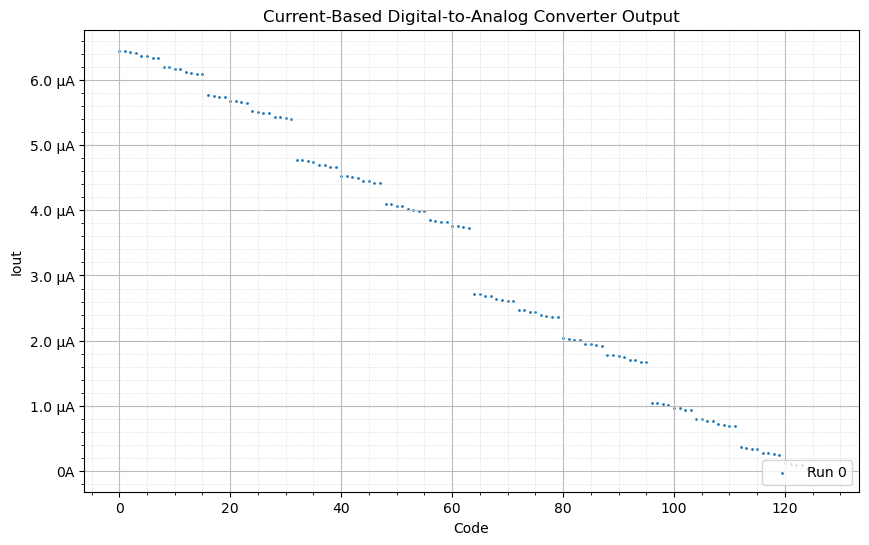

In [9]:
n_bits = 7
mc_simulations = []
results_dir = "M_2M_DAC"
for filename in os.listdir(results_dir):
    df = pd.read_csv(os.path.join(results_dir, filename), delimiter = "\s+")

    df["code"] = df["v0"] * 0
    for bit in range(n_bits):
        df["code"] = df["code"] + (df[f"v{bit}"] > 0) * 2 ** (n_bits - bit - 1)
        df.drop(f"v{bit}", axis = "columns", inplace = True)
    df.rename({"i(viout)": "Iout"}, axis = "columns", inplace = True)

    # print(df.head(10))
    
    mc_simulations.append(df)

plt.figure(figsize = (10, 6))
mc_helper.axes_labels("Code", "", "Iout", "A", "Current-Based Digital-to-Analog Converter Output")
mc_helper.make_grids()
for i, df_simulation in enumerate([mc_simulations[0]]):
    # plt.plot(np.array(df_simulation["code"]), np.array(df_simulation["Iout"]), linewidth = 1, label = f"Run {i}")
    plt.scatter(np.array(df_simulation["code"]), np.array(df_simulation["Iout"]), s = 1, label = f"Run {i}")
plt.legend(loc = "lower right")